In [1]:
!apt-get install poppler-utils #poppler


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 0s (323 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 148486 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [2]:
!pip install pdf2image #converts pdf file to images

In [3]:
!wget https://www.w3.org/WAI/ER/tests/xhtml/testfiles/resources/pdf/dummy.pdf  #testing the extensions

--2021-08-25 07:20:23--  https://www.w3.org/WAI/ER/tests/xhtml/testfiles/resources/pdf/dummy.pdf
Resolving www.w3.org (www.w3.org)... 128.30.52.100
Connecting to www.w3.org (www.w3.org)|128.30.52.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13264 (13K) [application/pdf]
Saving to: ‘dummy.pdf’

dummy.pdf           100%[===================>]  12.95K  --.-KB/s    in 0.01s   

2021-08-25 07:20:23 (1.08 MB/s) - ‘dummy.pdf’ saved [13264/13264]



In [4]:
!sudo apt install tesseract-ocr  #tesseract ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (5,158 kB/s)
debconf: unable to initi

In [5]:
!wget -P /usr/share/tesseract-ocr/4.00/tessdata/ https://github.com/tesseract-ocr/tessdata/raw/master/script/Devanagari.traineddata #Devangri Train_Data

--2021-08-25 07:20:28--  https://github.com/tesseract-ocr/tessdata/raw/master/script/Devanagari.traineddata
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/master/script/Devanagari.traineddata [following]
--2021-08-25 07:20:28--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/master/script/Devanagari.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18926275 (18M) [application/octet-stream]
Saving to: ‘/usr/share/tesseract-ocr/4.00/tessdata/Devanagari.traineddata’

Devanagari.trainedd 100%[===================>]  18.05M  --.-KB/s    in 0.1s    

2021-08-

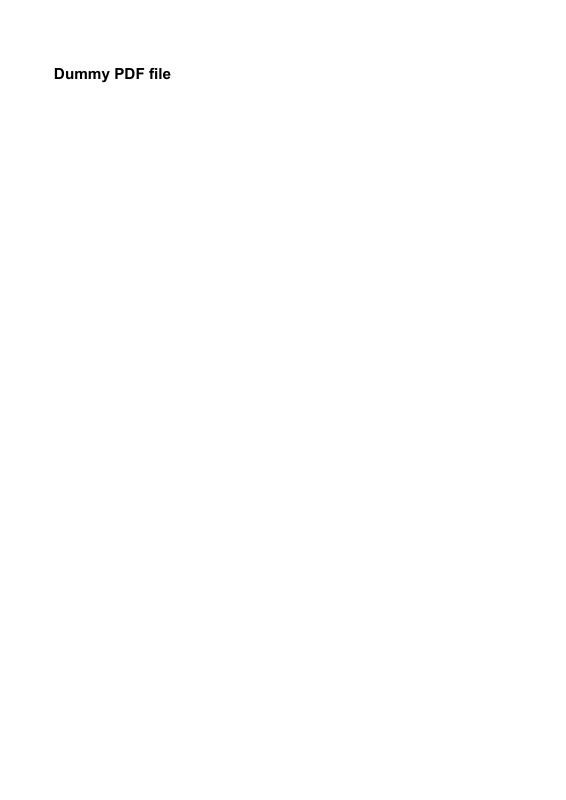

In [7]:
from pdf2image import convert_from_path, convert_from_bytes
from IPython.display import display, Image                                          #checking the installations
images = convert_from_bytes(open('dummy.pdf', 'rb').read(), size=800)
display(images[0])

In [8]:
!pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=f5e8bbc1654be37be12a21e57bb98ec4a837ca14aa736362f7768a562675861a
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


In [9]:
import cv2
import numpy as np
import pdf2image
import pytesseract
from google.colab.patches import cv2_imshow
import numpy as np

In [10]:
f = np.array(pdf2image.convert_from_path('/content/drive/MyDrive/1.pdf',
                                              first_page=5 ,last_page=5,
                                              dpi=300, grayscale=False)[0])
page_3 = cv2.cvtColor(f, cv2.COLOR_BGR2GRAY)
img=f
img2=f.copy()
img3=f.copy()                                           #converting image to grayscale

In [11]:
ret,thr = cv2.threshold(page_3, 128, 255, cv2.THRESH_BINARY_INV)         #Finding the threshold value

In [12]:
contours,hirearchy= cv2.findContours(thr, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE) # geting the contours

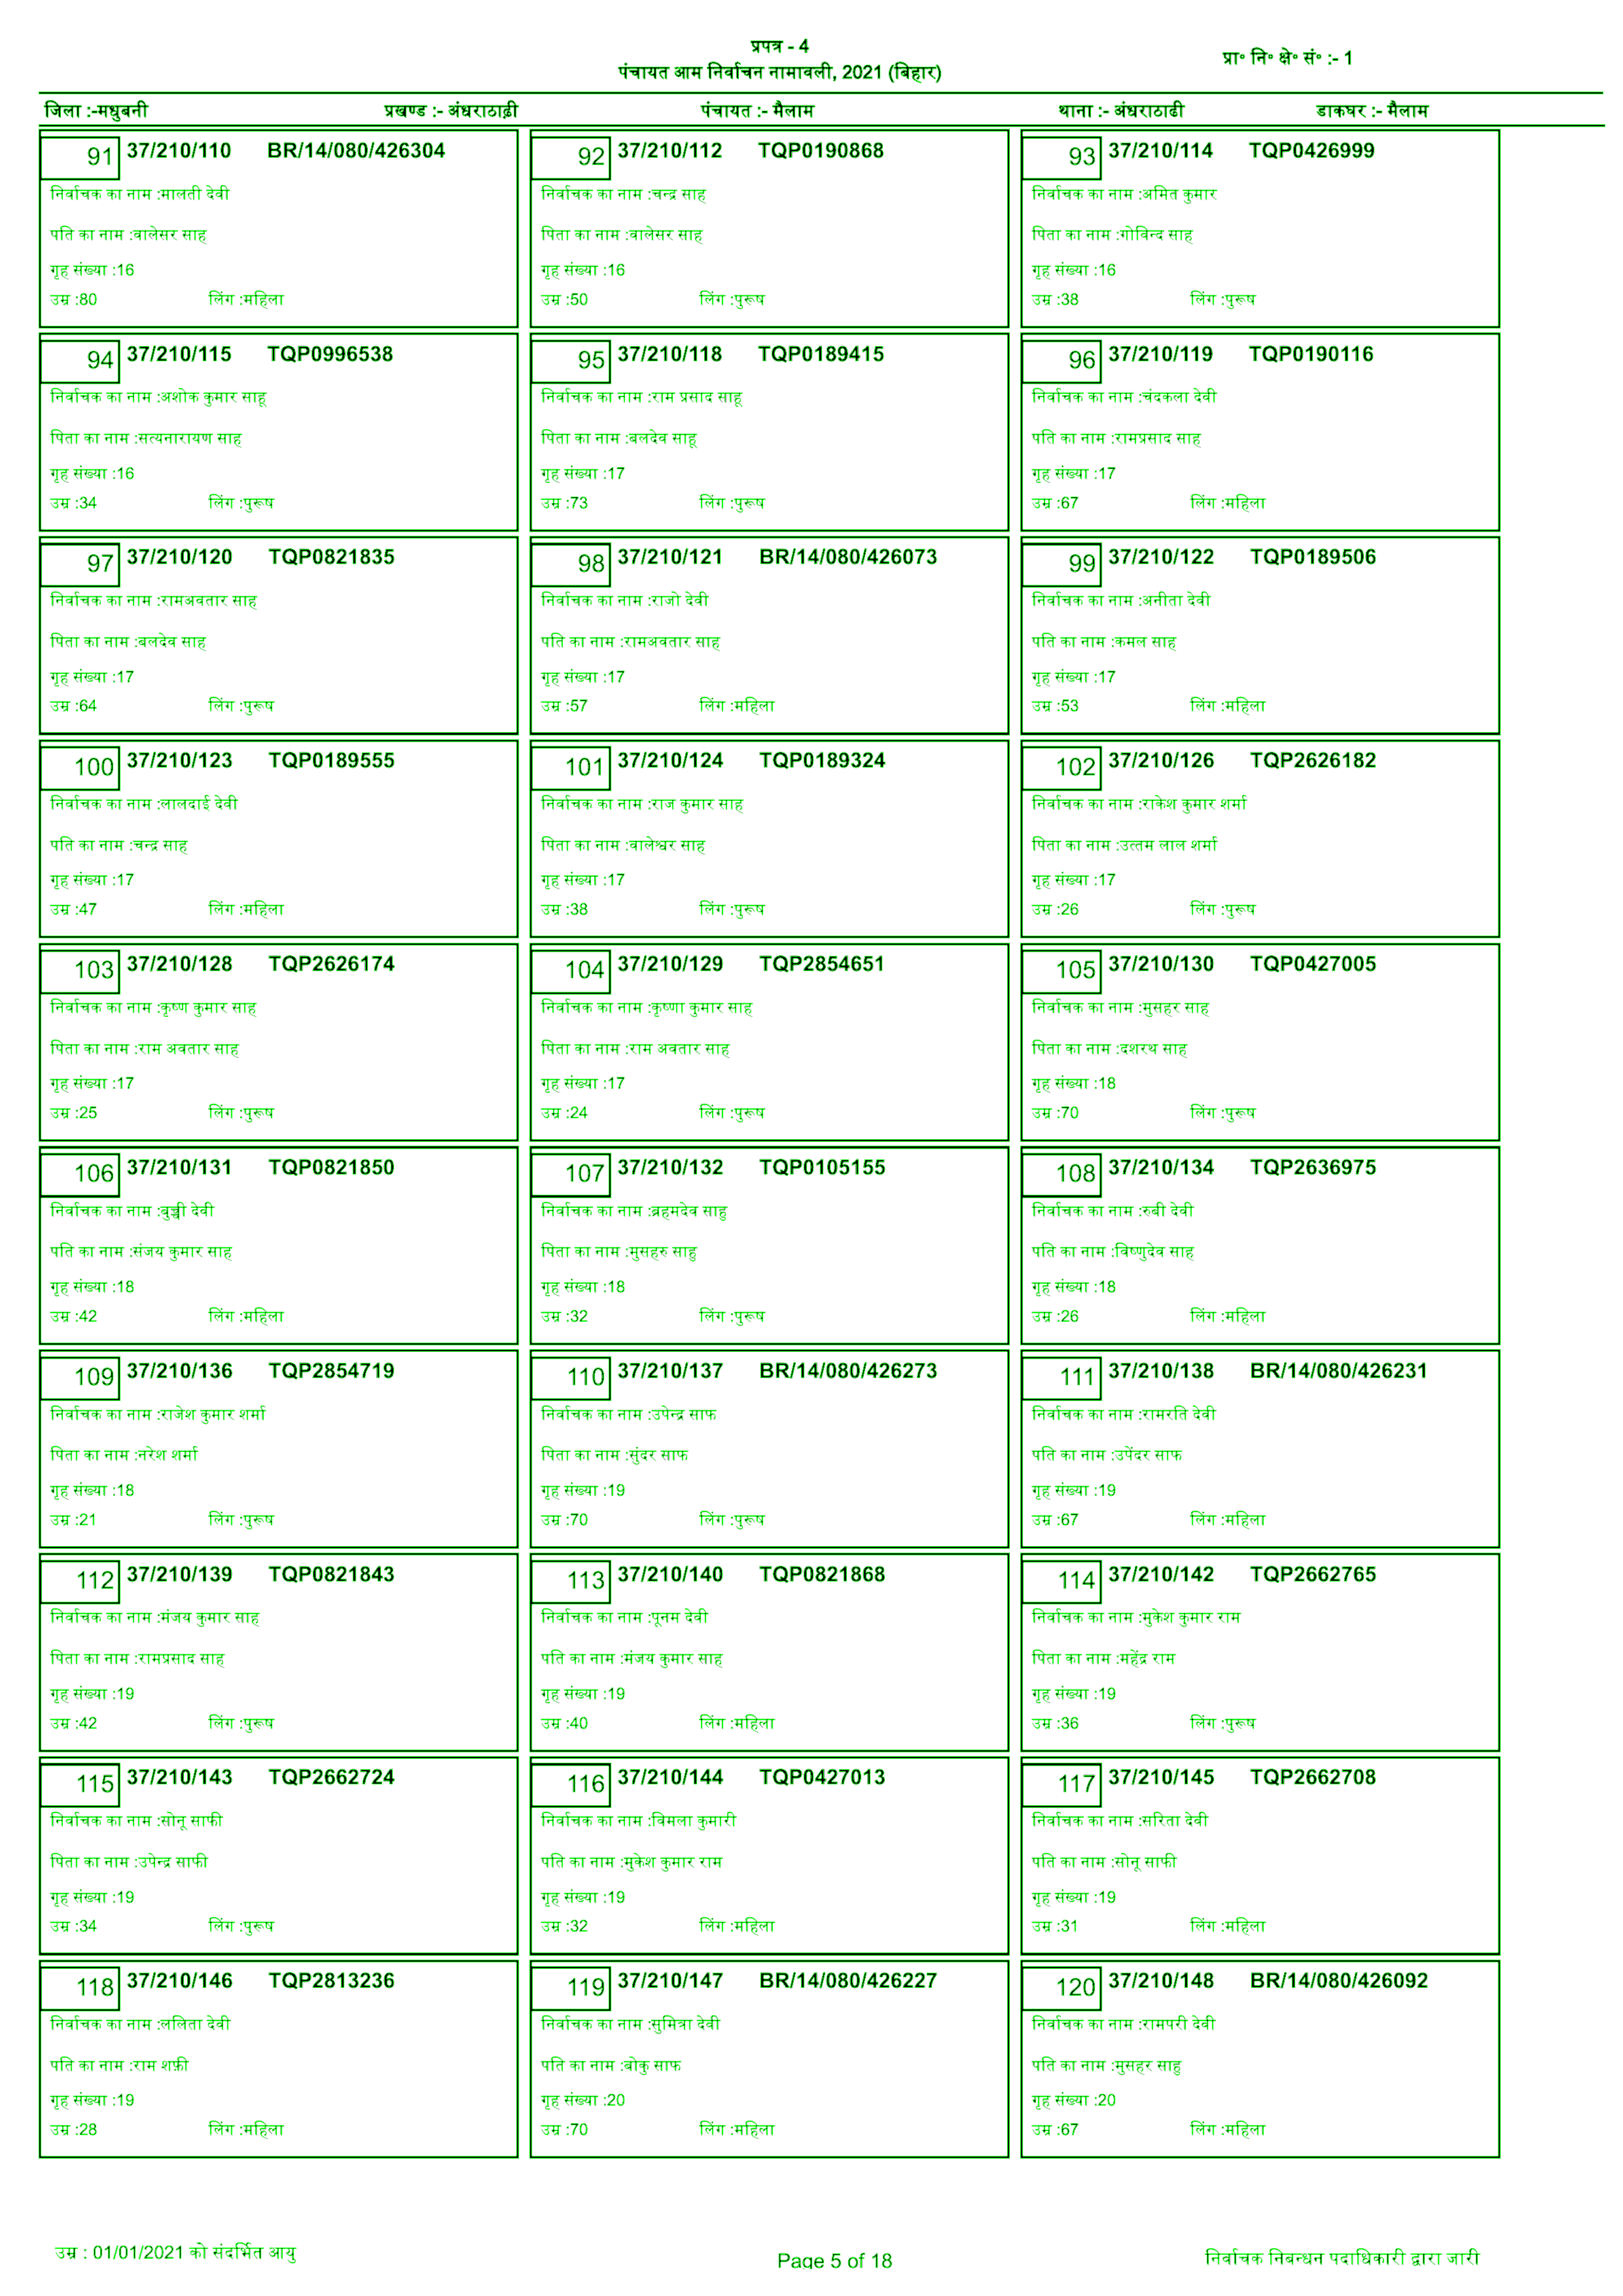

In [13]:
cv2.drawContours(img,contours,-1,(0,255,0),1)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()                                   

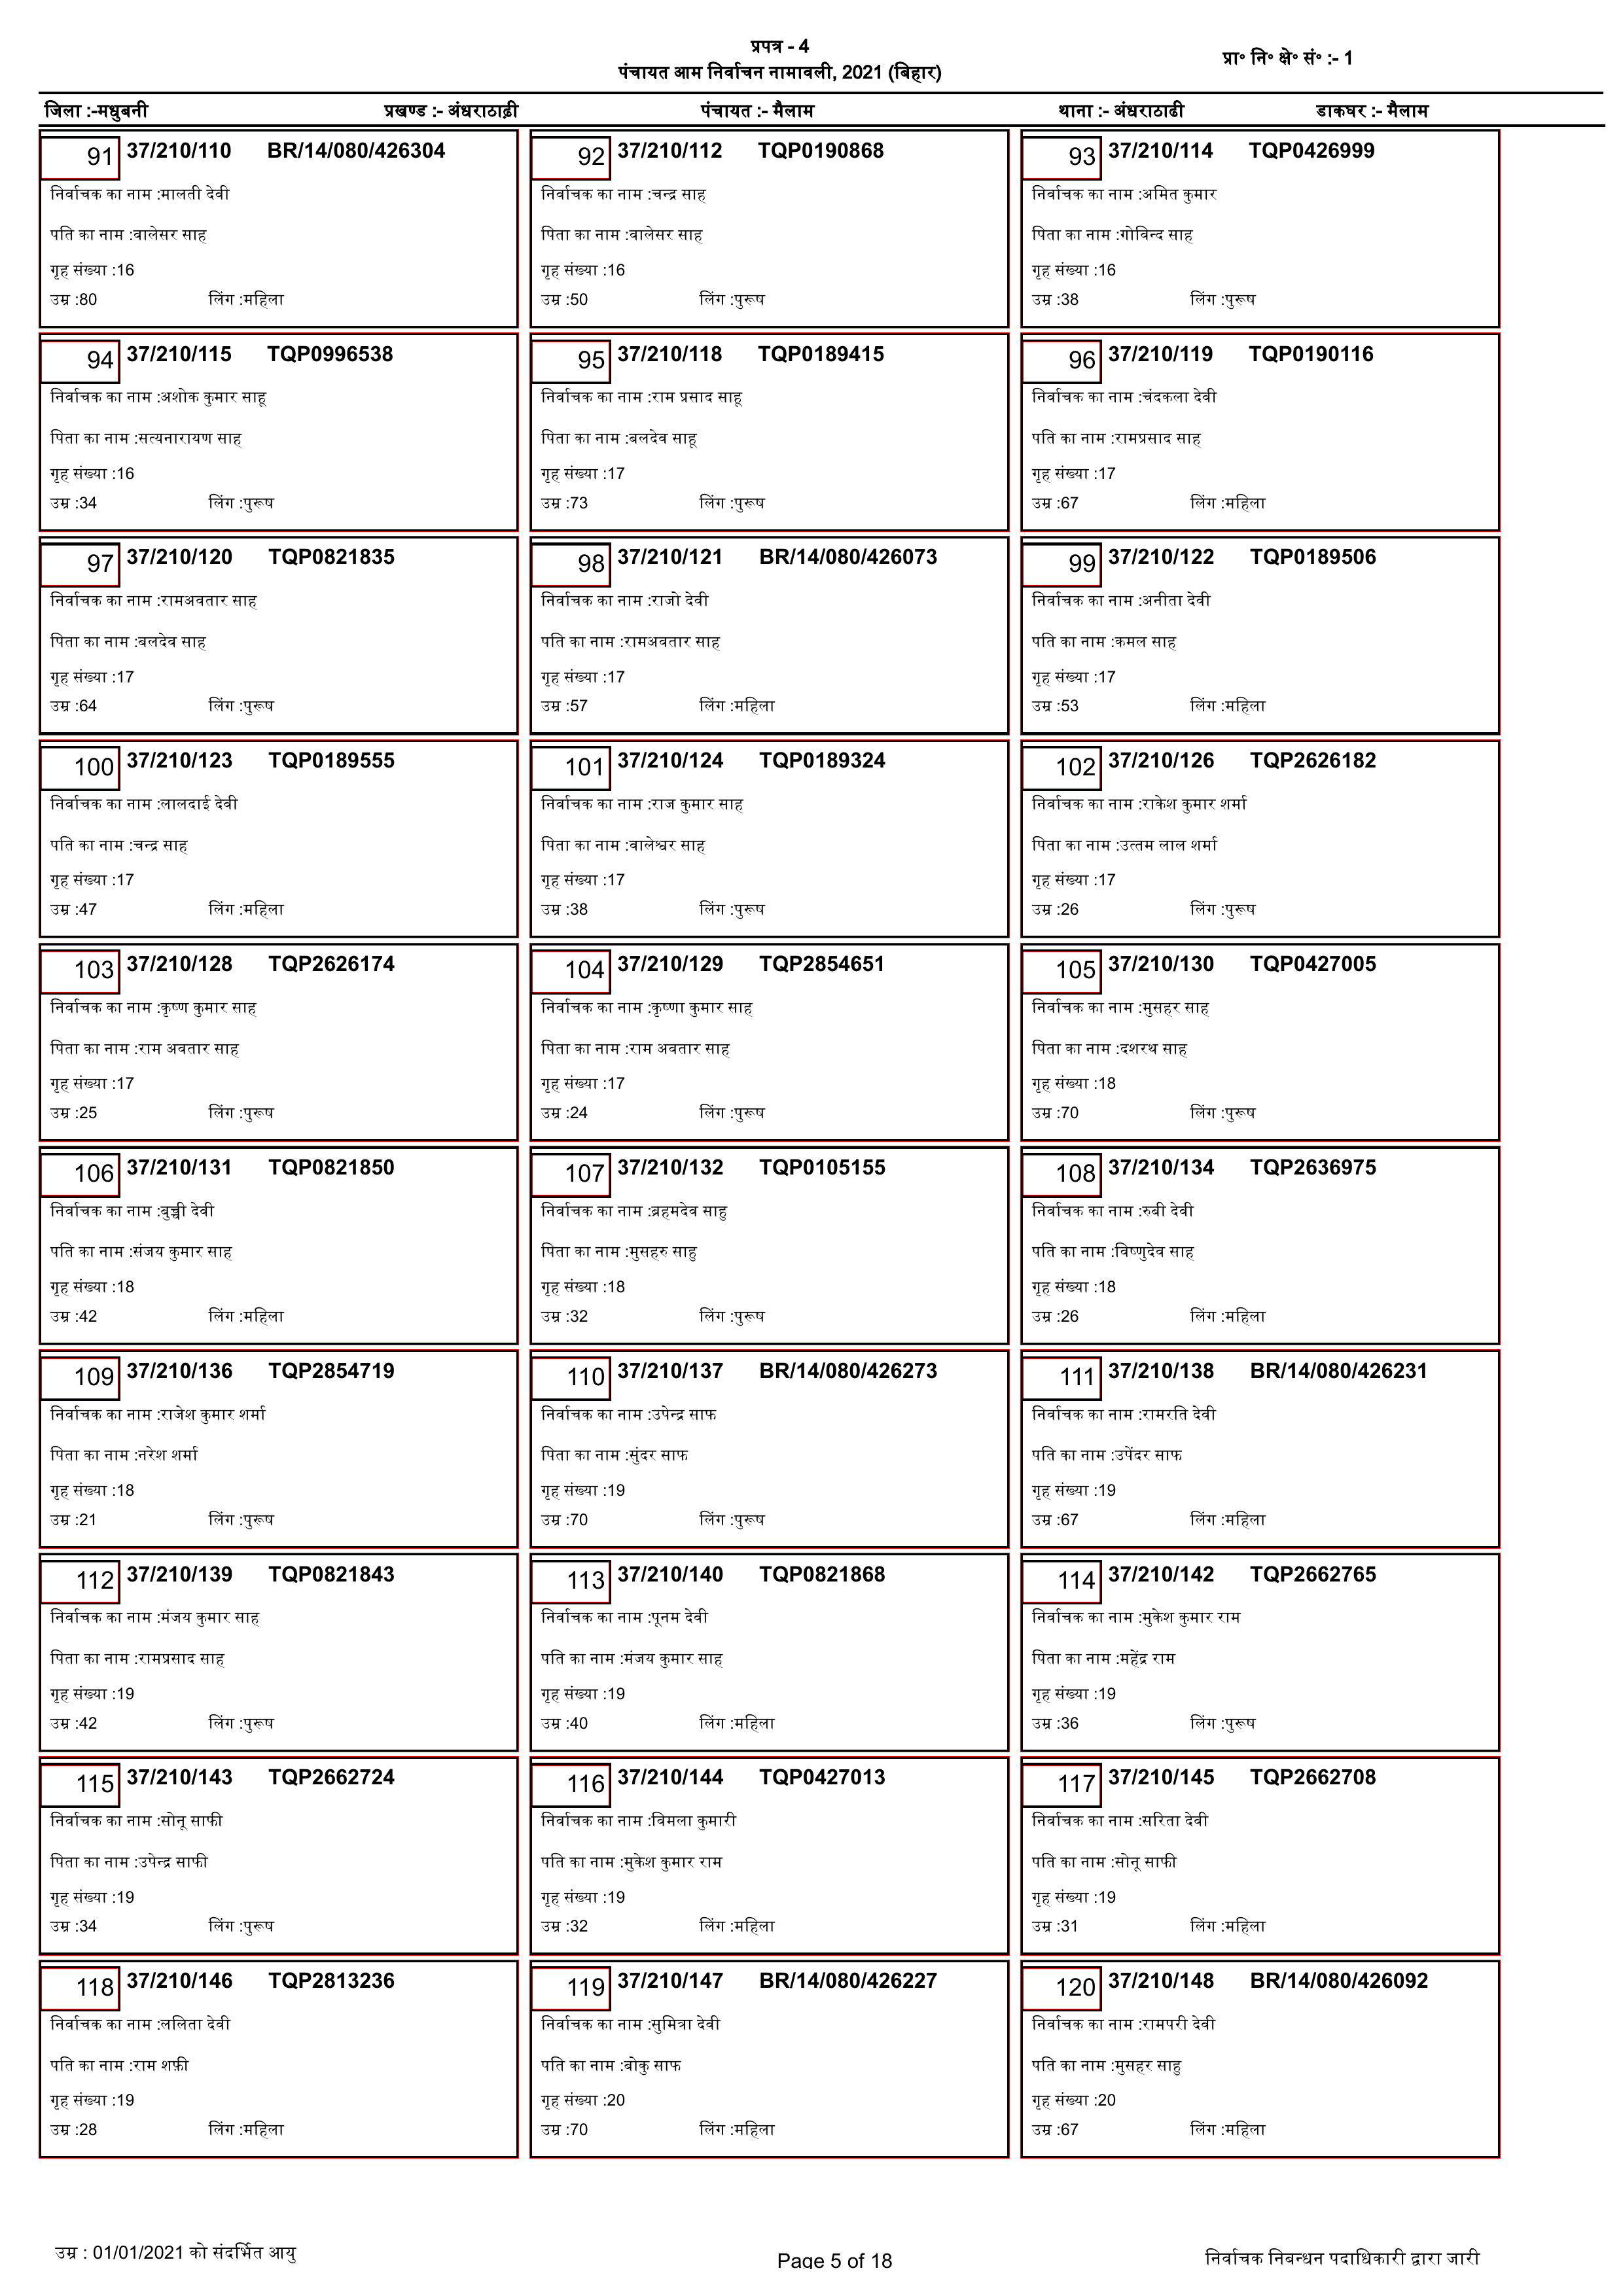

In [47]:
cnts_table=[]
for cnt in contours: 
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
    if len(approx)==4 and cv2.contourArea(cnt) > 10000 and cv2.contourArea(cnt) < 1000000:
     cv2.drawContours(img2,[cnt],0,(0,0,255),1)
     cnts_table.append(cv2.boundingRect(cnt))
cv2_imshow(img2)
cv2.waitKey(0)           #getting the outer boxes area parameter set to greater then 10000 if set to 1000 inner small box included too
cv2.destroyAllWindows()

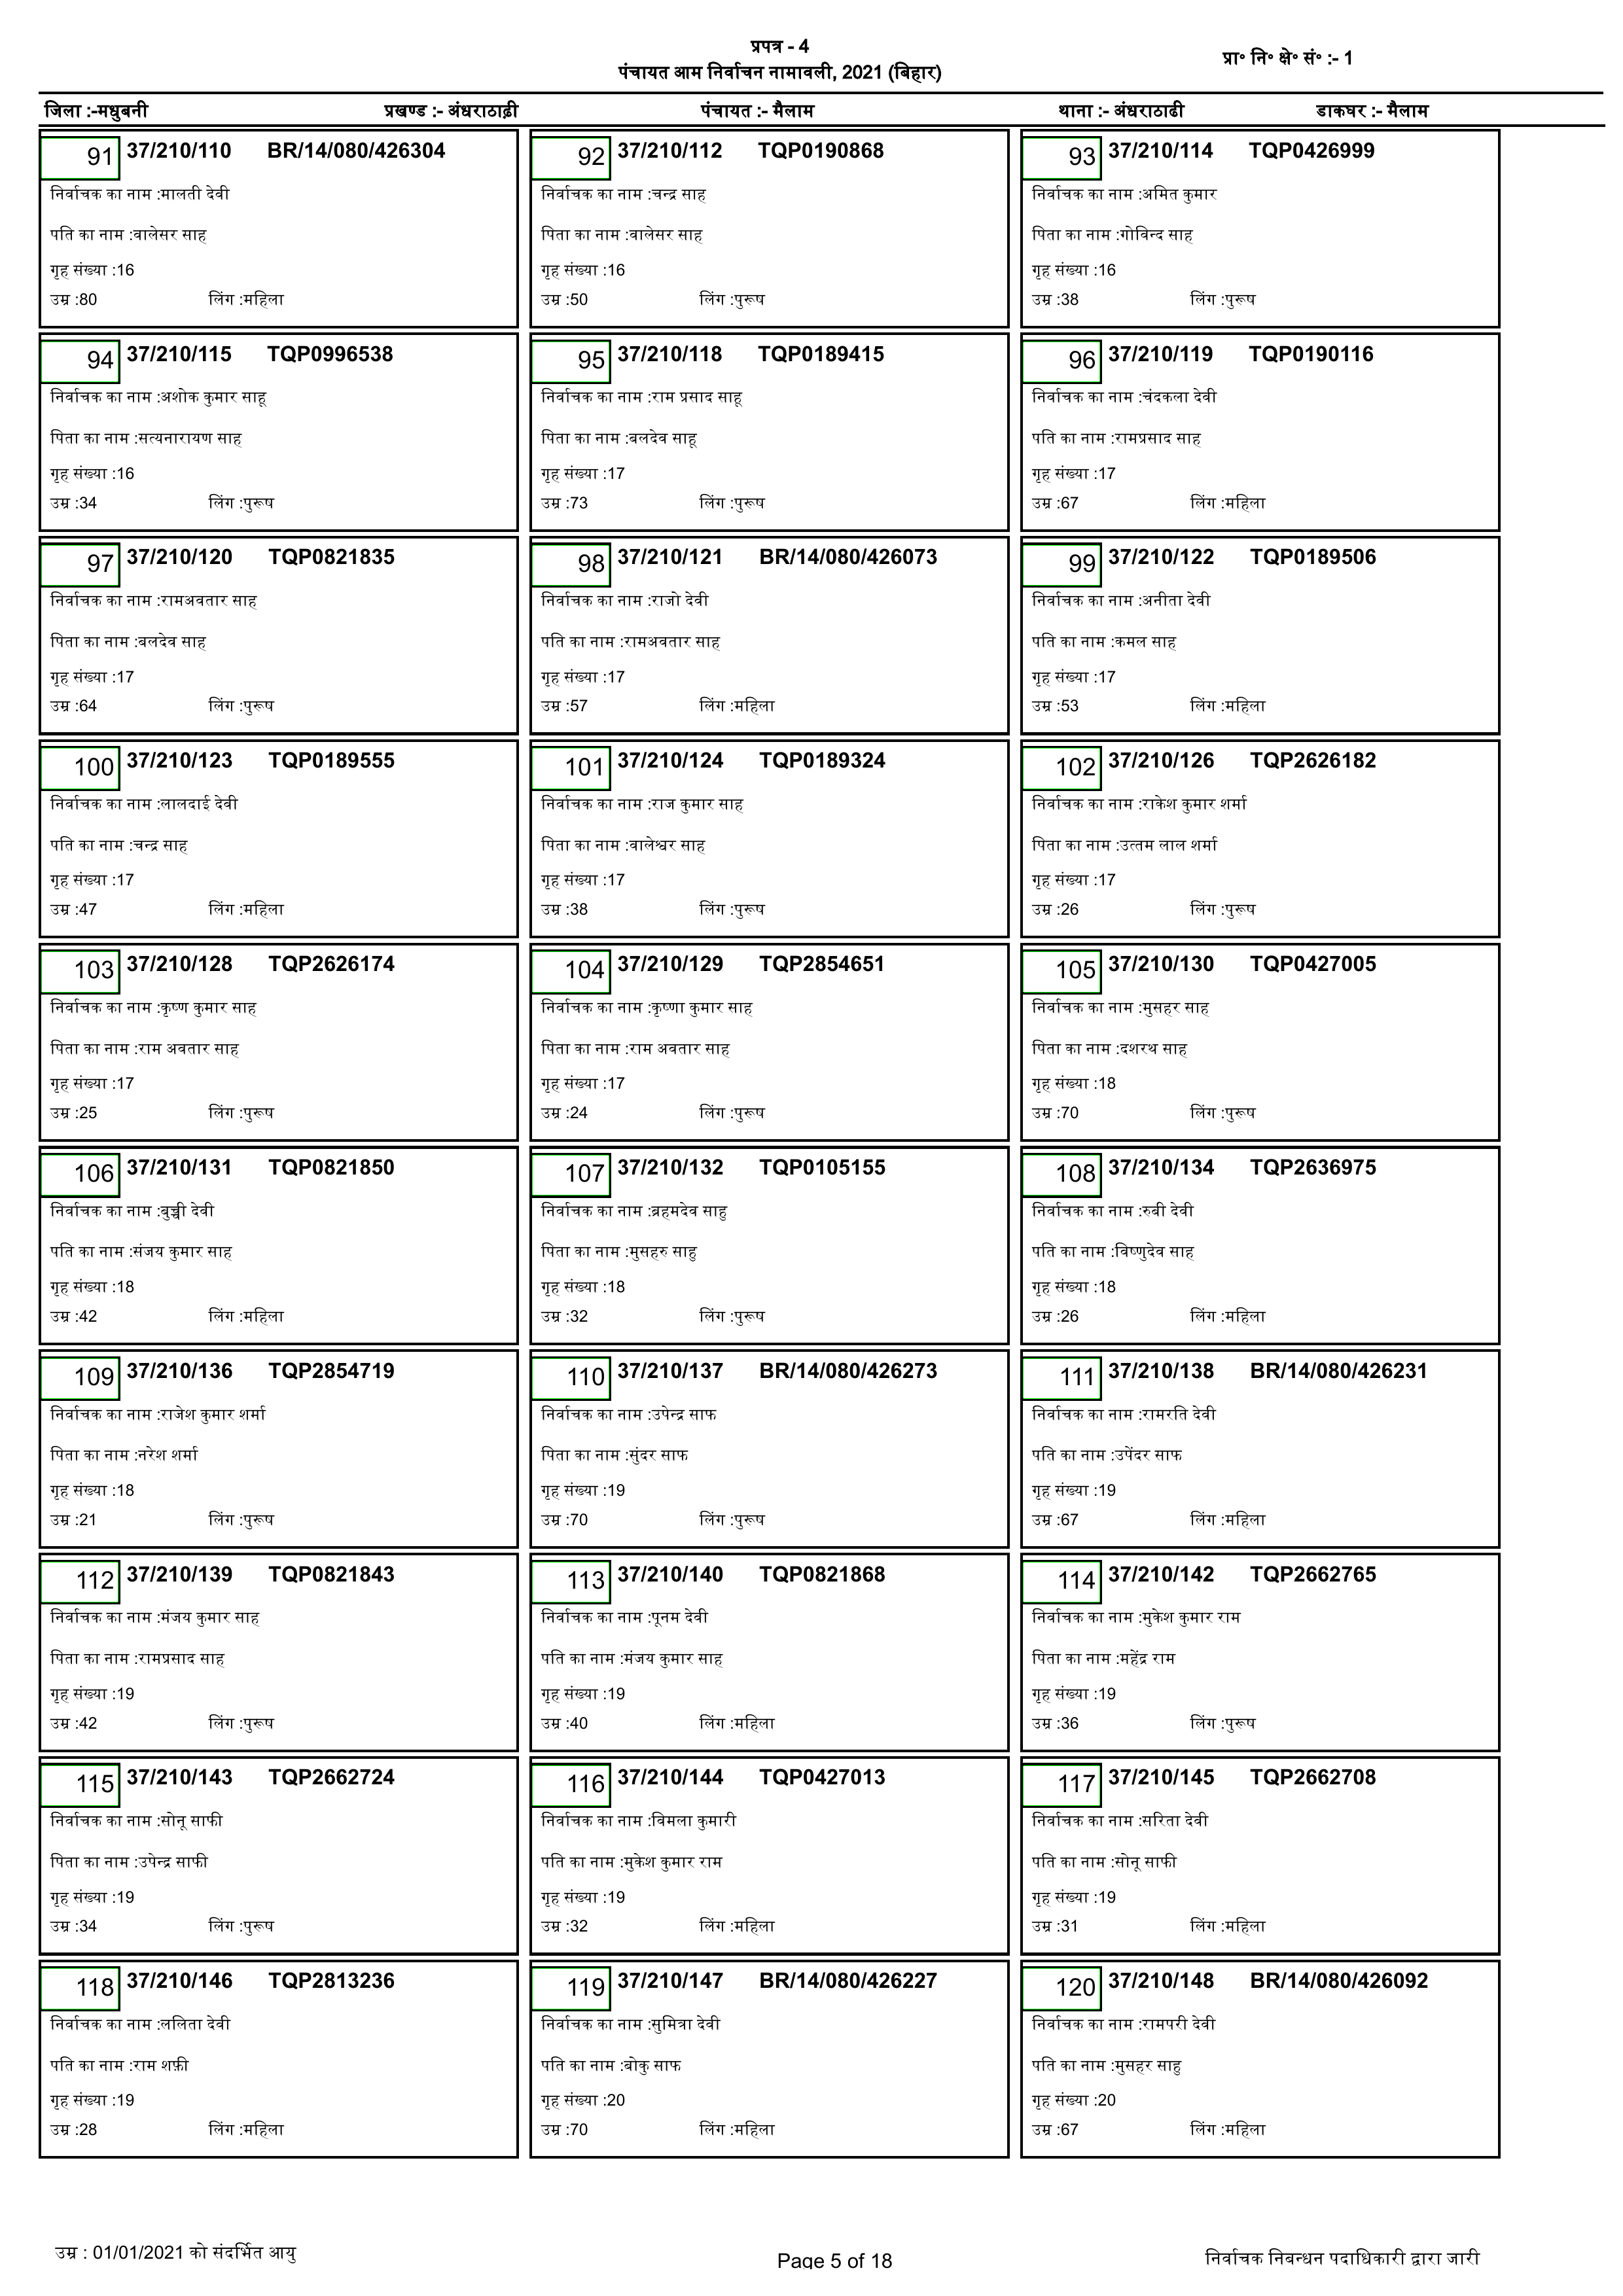

In [48]:
cnts_table2=[]
for cnt in contours: 
    approx = cv2.approxPolyDP(cnt,0.01*cv2.arcLength(cnt,True),True)
    if len(approx)==4 and cv2.contourArea(cnt) > 1000 and cv2.contourArea(cnt) < 10000:
     cv2.drawContours(img3,[cnt],0,(0,255,0),1)
     cnts_table2.append(cv2.boundingRect(cnt))      #Execute this cell if you need inner numbered boxes
cv2_imshow(img3)
cv2.waitKey(0)
cv2.destroyAllWindows() 


In [49]:
sorted_table = sorted(cnts_table, key=lambda r: r[1])     #sort  the outer boxes according to y position
#sorted_table2 = sorted(cnts_table2, key=lambda r: r[1]) its for inner boxes

In [50]:
for (x, y, w, h) in sorted_table:
  text = pytesseract.image_to_string(page_3[y:y+h, x:x+w],
                                       config='--psm 6', lang='Devanagari')
  text = text.replace('\f', '')
  st='x: {}, y: {}, text:\n {}'.format(x, y, text)
  print('x: {}, y: {}, text:\n {}'.format(x, y, text))                       #using ocr  on boxes

x: 1559, y: 197, text:
 37/210/114 TQPO426999
निर्वाचक का नाम :अमित कुमार
पिता का नाम :गोविन्द साह
गृह संख्या :16
उम्र :38 लिंग :पुरूष

x: 809, y: 197, text:
 37/210/112 TQPO190868
निर्वाचक का नाम :चन्द्र साह
पिता का नाम :वालेसर साह
गृह संख्या :16
उम्र :50 लिंग :पुरूष

x: 59, y: 197, text:
 37/210/110  BR/14/080/426304
निर्वाचक का नाम :मालती देवी
पति का नाम :वालेसर साह
गृह संख्या :16
उम्र :80 लिंग :महिला

x: 1559, y: 508, text:
 | 96 | 37/210/119  TQPO190116
निर्वाचक का नाम :चंदकला देवी
पति का नाम :रामप्रसाद साह
गृह संख्या :17
उम्र :67 लिंग :महिला

x: 809, y: 508, text:
 37/210/118 TQPO189415
निर्वाचक का नाम :राम प्रसाद साहू
पिता का नाम :बलदेव साहू
गृह संख्या :17
उम्र :73 लिंग :पुरूष

x: 59, y: 508, text:
 37/210/115  TQPO996538
निर्वाचक का नाम :अशोक कुमार साहू
पिता का नाम :सत्यनारायण साह
गृह संख्या :16
उम्र :34 लिंग :पुरूष

x: 1559, y: 819, text:
 | 99 | 37/210/122 TQPO189506
निर्वाचक का नाम :अनीता देवी
पति का नाम :कमल साह
गृह संख्या :17
उम्र :53 लिंग :महिला

x: 809, y: 819, text:
 | 

In [76]:
Data_List=[]
for (x, y, w, h) in sorted_table:
  text = pytesseract.image_to_string(page_3[y:y+h, x:x+w],
                                       config='--psm 6', lang='Devanagari')
  text = text.replace('\f', '')
  char_to_replace = {r'\nनिर्वाचक का नाम':'','\nपिता का नाम':'','\nगृह संख्या':'','\nउम्र':'','लिंग':'','\n':''}
  rtext1 = text.replace('\nनिर्वाचक का नाम','')
  rtext2 = rtext1.replace('\nपिता का नाम','')
  rtext3 = rtext2.replace('\nगृह संख्या','')
  rtext4 = rtext3.replace('\nउम्र','')
  rtext5 = rtext4.replace('लिंग','')
  rtext6 = rtext5.replace('\n','')                                       #Cleansing the Data to store in the csv 
  rtext7 = rtext6.replace('पति का नाम','')
  Data_List.append( rtext7.split(":"))

In [79]:
print(Data_List)

[['37/210/114 TQPO426999 ', 'अमित कुमार ', 'गोविन्द साह ', '16 ', '38  ', 'पुरूष'], ['37/210/112 TQPO190868 ', 'चन्द्र साह ', 'वालेसर साह ', '16 ', '50  ', 'पुरूष'], ['37/210/110  BR/14/080/426304 ', 'मालती देवी ', 'वालेसर साह ', '16 ', '80  ', 'महिला'], ['| 96 | 37/210/119  TQPO190116 ', 'चंदकला देवी ', 'रामप्रसाद साह ', '17 ', '67  ', 'महिला'], ['37/210/118 TQPO189415 ', 'राम प्रसाद साहू ', 'बलदेव साहू ', '17 ', '73  ', 'पुरूष'], ['37/210/115  TQPO996538 ', 'अशोक कुमार साहू ', 'सत्यनारायण साह ', '16 ', '34  ', 'पुरूष'], ['| 99 | 37/210/122 TQPO189506 ', 'अनीता देवी ', 'कमल साह ', '17 ', '53  ', 'महिला'], ['| 98 | 37/210/121 BR/14/080/426073 ', 'राजो देवी ', 'रामअवतार साह ', '17 ', '57  ', 'महिला'], ['37/210/120 TQPO821835 ', 'रामअवतार साह ', 'बलदेव साह ', '17 ', '64  ', 'पुरूष'], ['37/210/126 TQP2626182 ', 'राकेश कुमार शर्मा ', 'उत्तम लाल शर्मा ', '17 ', '26  ', 'पुरूष'], ['37/210/124 TQPO189324 ', 'राज कुमार साह ', 'वालेश्वर साह ', '17 ', '38  ', 'पुरूष'], ['37/210/123 TQPO189555 ',

In [81]:
import csv
f = open('/content/drive/MyDrive/ML/ID/VOTER(1).csv', 'a+',encoding='utf-8',newline='')
with f:    
    write = csv.writer(f)
    write.writerows(Data_List)                                        #writing to csv
f.close()